In [1]:
#%matplotlib ipympl  # enable this for realtime graphs

# first compile the c modules where the model depends on
from explain_core.ModulesCompiler import compile_modules;

# compile the c++ modules if necessary
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# disable spontaneous breathing
neo.model.models["Breathing"].breathing_enabled = False

# configure the ventilator
neo.model.models["Ventilator"].vent_mode = "PRVC"
neo.model.models["Ventilator"].pip_cmh2o_max = 20.0
neo.model.models["Ventilator"].peep_cmh2o = 3.0
neo.model.models["Ventilator"].tidal_volume = 0.015
neo.model.models["Ventilator"].vent_rate = 5.0
neo.model.models["Ventilator"].insp_flow = 8.0

# configure ecls
neo.model.models["Ecls"].fio2_gas = 0.30
neo.model.models["Ecls"].co2_flow_gas = 40.0
neo.model.models["LV"].el_max = 5000
neo.model.models["RV"].el_max = 5000
neo.model.models["Ecls"]._pump.pump_rpm = 2000.0

# turn on the ventilator
neo.model.models["Ventilator"].switch_ventilator(True)

# print the model status object
for message in model.status['log']:
    print(message)

# stabilize by calculating 120 seconds
neo.fastforward(120)

 Model 'normal neonate' loaded and initialized correctly.
Ready in 7.1 sec. Average model step in 0.0295 ms.


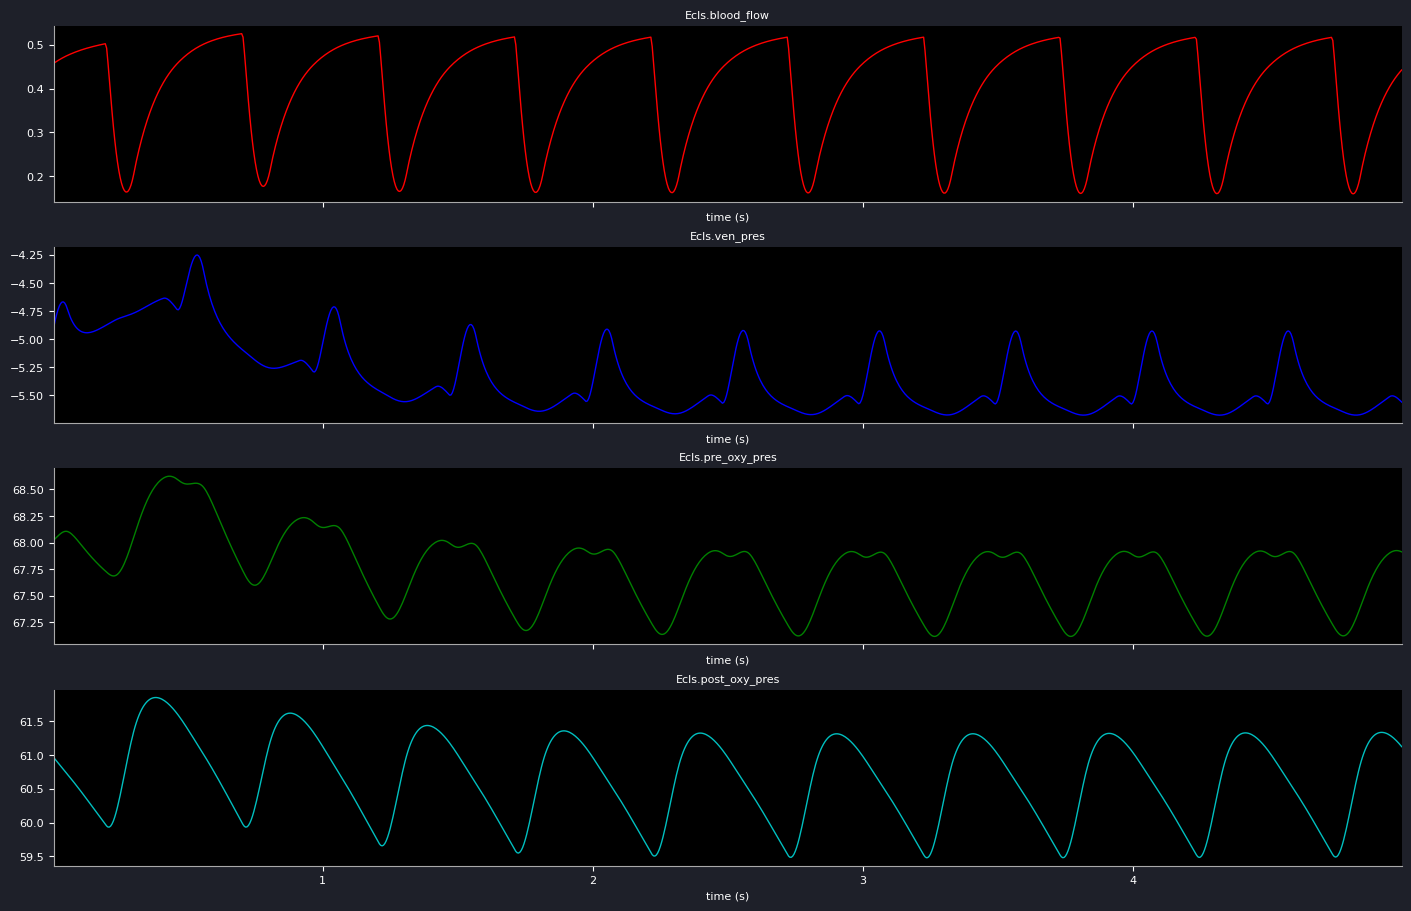


Ecls.blood_flow : max    0.52503 min    0.15982
Ecls.ven_pres   : max   -4.25186 min   -5.67593
Ecls.pre_oxy_pres: max   68.62414 min   67.11693
Ecls.post_oxy_pres: max   61.85268 min   59.47836


In [2]:
neo.plot_time_graph(["Ecls.blood_flow","Ecls.ven_pres","Ecls.pre_oxy_pres","Ecls.post_oxy_pres"], sharey=False, combined=False, time_to_calculate=5, fill=False)

In [3]:
neo.get_vitals()


AA.pres         : max   60.00237, min   48.88536 mmHg
PA.pres         : max   19.10223, min   10.94803 mmHg
IVCI.pres       : max    2.55672, min    2.31892 mmHg


{'heartrate': 118.97731146247696,
 'spo2_pre': 93.19095480331741,
 'spo2_post': 97.54320730184925,
 'abp_systole': 60.00237,
 'abp_diastole': 48.88536,
 'pap_systole': 19.10223,
 'pap_diastole': 10.94803,
 'cvp': 2.3981787399999996,
 'resp_rate': 0.0,
 'pH': 7.359119192586819,
 'po2': 66.0101925251786,
 'pco2': 46.88508732257874,
 'hco3': 26.113657151873614,
 'be': -0.04351884803410062}

In [4]:
neo.get_bloodgas("AD")

{'ph': 7.4366261617337015,
 'po2': 90.75301705250078,
 'pco2': 38.7851718577614,
 'hco3': 25.8229383271304,
 'be': 1.36996701707808,
 'so2': 97.54320730184925}